In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,SelectFromModel
%matplotlib inline

In [ ]:
#import the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

**HANDLING MISSING VALUES**





In [ ]:
data.isnull().sum()
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Since there are no null values in our dataset so we will not do any thing. But if there are Null values in any column then we have two options to handle missing values.

1.) General Imputation:
  
  In general imputation we will check each column and check if there are any    null values we will fill that value with calculating mean and median of that column.

2.) Simple Case Imputation

  In simple Case Imputation we will calculate mean and median according to corresponding column and fill that null values with mean and median.

**DUPLICATE DATA HANDLING**

In [ ]:
data.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
data.duplicated(keep=False).sum()

0

Since we do not have any duplicate data in our dataset so the value is coming 0. But if there are any duplicate values present in our dataset then we will use **drop_duplicate(keep=First,inplace=True)** function to remove that duplicate rows.

In this we are passing **keep = First** because we want on row which contains that values and we are also passing **inplace=True** because we want to change in the same memory where that dataset is present.

**CHECKING FOR OUTLIERS**

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(data, x = 'Outcome', y = 'Pregnancies', color = 'Outcome', notched = True, height = 300, width = 500)
fig.show()

In [ ]:
data_0 = data[data['Outcome']==0]
data_1 = data[data['Outcome']==1]

**REMOVE OUTLIERS USING IQR METHOD**

In [ ]:
q1 = data_0['Pregnancies'].quantile(0.25)
q3 = data_0['Pregnancies'].quantile(0.75)
IQR = q3 - q1
upper_whisker = q3+1.5*IQR
lower_whisker = q1-1.5*IQR
upper_whisker, lower_whisker

(11.0, -5.0)

In [ ]:
data['Pregnancies'] = np.where((data['Outcome']==0) & (data['Pregnancies']>upper_whisker), upper_whisker, data['Pregnancies'])
data['Pregnancies'] = np.where((data['Outcome']==0) & (data['Pregnancies']<lower_whisker), lower_whisker, data['Pregnancies'])

In [ ]:
for i in data.columns:
    if i != 'Outcome' and i !='Pregnancies':
        fig = px.box(data, x = 'Outcome', y = i, color = 'Outcome', notched = True, height = 300, width = 500)
        fig.show()

In [ ]:
for i in data.columns:
    if i!='Outcome' and i!='Pregnancies':
        q1 = data_0[i].quantile(0.25)
        q3 = data_0[i].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3+1.5*iqr
        lower_whisker = q1-1.5*iqr
        data[i] = np.where((data['Outcome']==0) & (data[i]>upper_whisker), upper_whisker, data[i])
        data[i] = np.where((data['Outcome']==0) & (data[i]<lower_whisker), lower_whisker, data[i])
        
        q1 = data_1[i].quantile(0.25)
        q3 = data_1[i].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3+1.5*iqr
        lower_whisker = q1-1.5*iqr
        data[i] = np.where((data['Outcome']==1) & (data[i]>upper_whisker), upper_whisker, data[i])
        data[i] = np.where((data['Outcome']==1) & (data[i]<lower_whisker), lower_whisker, data[i])

In [ ]:
for i in data.columns:
    if i != 'Outcome' and i !='Pregnancies':
        fig = px.box(data, x = 'Outcome', y = i, color = 'Outcome', notched = True, height = 300, width = 500)
        fig.show()

**NORMALIZE THE FEATURES PRESENT IN THE DATA**

MIN-MAX - min max will scale your values between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
norm_array=scaler.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])

In [ ]:
df = pd.DataFrame(norm_array, columns=data.columns)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.668831,0.500000,0.388889,0.000000,0.573561,0.407195,0.617021,1.0
1,0.058824,0.259740,0.411765,0.322222,0.000000,0.399378,0.202485,0.212766,0.0
2,0.470588,0.896104,0.382353,0.000000,0.000000,0.317263,0.440571,0.234043,1.0
3,0.058824,0.285714,0.411765,0.255556,0.224813,0.436703,0.066011,0.000000,0.0
4,0.000000,0.597403,0.058824,0.388889,0.401794,0.809953,1.000000,0.255319,1.0


In [ ]:
df.shape


(768, 9)

  **CORRELATION AND HEATMAP**

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.133773,0.188751,-0.083562,-0.069500,0.031317,-0.016554,0.563262,0.229326
Glucose,0.133773,1.000000,0.209777,0.064396,0.325833,0.241064,0.125839,0.276840,0.491062
BloodPressure,0.188751,0.209777,1.000000,0.141835,0.039578,0.298605,0.039149,0.320875,0.131347
SkinThickness,-0.083562,0.064396,0.141835,1.000000,0.482352,0.398884,0.186481,-0.110132,0.074001
Insulin,-0.069500,0.325833,0.039578,0.482352,1.000000,0.205901,0.188465,-0.042611,0.157517
BMI,0.031317,0.241064,0.298605,0.398884,0.205901,1.000000,0.147993,0.060649,0.313539
DiabetesPedigreeFunction,-0.016554,0.125839,0.039149,0.186481,0.188465,0.147993,1.000000,0.048166,0.204826
Age,0.563262,0.276840,0.320875,-0.110132,-0.042611,0.060649,0.048166,1.000000,0.264721
Outcome,0.229326,0.491062,0.131347,0.074001,0.157517,0.313539,0.204826,0.264721,1.000000


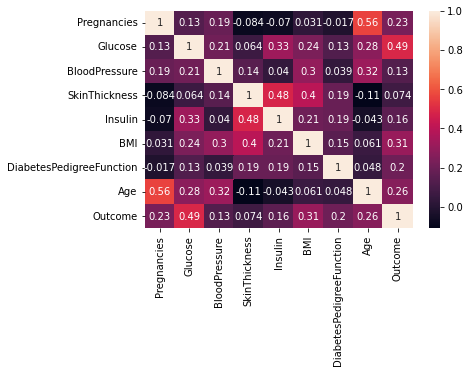

In [ ]:
sns.heatmap(df.corr(),annot=True);

**FEATURE SELECTION**

As skinthinkness is not much correalated with outcome so we will drop this column and check our accuracy on the model.If accuracy increases then we will drop this column otherwise add it again. 

In [ ]:
d=df.drop(columns=['SkinThickness'])

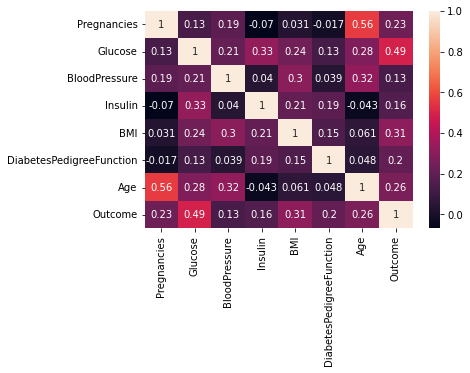

In [ ]:
sns.heatmap(d.corr(),annot=True);

We can see from the correlation matrix that no two input variables are highly correlated so data reduction can not be done.

**DATA SAMPLING**



In [ ]:
X = d.drop(columns = ['Outcome'])
y = d['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.15,random_state=101)

**MODEL TRAINING AND EVALUATION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
models = []
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))



DT
F1-score is
0.6024096385542169
op
0.7155172413793104


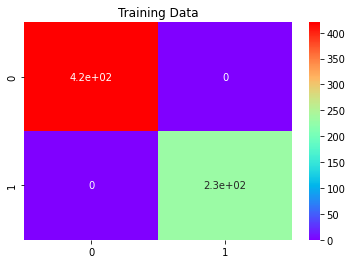

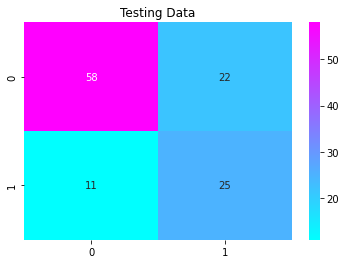


RF
F1-score is
0.6376811594202899
op
0.7844827586206896


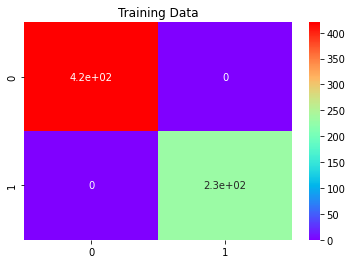

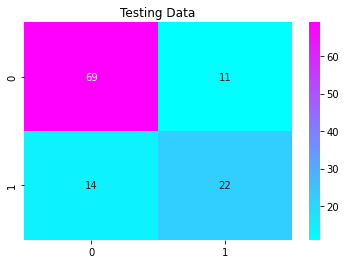

In [34]:
from sklearn.metrics import f1_score
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(name)
    h=f1_score(y_test,test_pred,labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    print("F1-score is")
    print(h)
    from sklearn.metrics import accuracy_score
    g=accuracy_score(y_test, test_pred)
    print("op")
    print(g)

    plt.figure(figsize=(6, 4))
    plt.title("Training Data")
    sns.heatmap(confusion_matrix(y_train,train_pred), annot = True, cmap = 'rainbow')
    plt.show()
    plt.title('Testing Data')
    sns.heatmap(confusion_matrix(y_test,test_pred), annot=True, cmap = 'cool')
    plt.show()
    print('')